# Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset

df=pd.read_excel('Car_prediction_price.xlsx')

In [4]:
df

,Model(used car),Km driven,Fuel,year of purchase,Location,Price
0,"'BMW 3 Series 320d, 2011, Diesel',",88000,Diesel,2011,"'ANDHERI EAST, MUMBAI',",695000
1,"'BMW 3 Series 320d Sedan, 2010, Diesel',",120000,Diesel,2010,"'GOREGAON EAST, MUMBAI',",545000
2,"'BMW 3 Series 320d, 2011, Diesel',",88000,Diesel,2011,"'THANE WEST, THANE',",695000
3,"'Audi A6 35 TDI, 2007, Diesel',",62000,Diesel,2007,"'THANE BELAPUR ROAD, THANE',",549000
4,"'BMW 530d Diesel',",96000,Diesel,2008,"'ANDHERI EAST, MUMBAI',",620000
5,"'Audi A6 2009-2011 2.7 TDI, 2009, Diesel',",129000,Diesel,2009,"'THANE WEST, THANE',",575000
6,'Mercedes-Benz New C-Class C 250 CDI Elegance...,89000,Diesel,2011,"'ANDHERI EAST, MUMBAI',",700000
7,'Audi A4 2008-2014 2.0 TDI Celebration Editio...,60000,Diesel,2008,"'DAHISAR EAST, MUMBAI'",580000
8,"'2011 Model Tata Safari',",76000,NaN,2011,"'PEROORKADA, THIRUVANANTHAPURAM',",410000
9,"'Tata Safari for sale',",107000,NaN,2008,"'VATTIYOORKAVU, THIRUVANANTHAPURAM',",350000


In [5]:
df.columns   #Name of the columns in the dataset

Index(['                                 Model(used car)', '       Km driven',
       '    Fuel', '   year of purchase',
       '                           Location', '            Price'],
      dtype='object')

In [6]:
#Checking the info() method to get an a general idea about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0                                    Model(used car)  37 non-null     object
 1          Km driven                                  37 non-null     int64 
 2       Fuel                                          28 non-null     object
 3      year of purchase                               37 non-null     int64 
 4                              Location               37 non-null     object
 5               Price                                 37 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ KB


In [7]:
#Lets check the null values if any
df.isnull().sum()

                                 Model(used car)    0
       Km driven                                    0
    Fuel                                            9
   year of purchase                                 0
                           Location                 0
            Price                                   0
dtype: int64

In [8]:
#There are 9 null values present in the column 'Fuel'

In [9]:
#Shape of the dataset
df.shape

(37, 6)

In [10]:
#Analysing data of the column 'Fuel'
df['    Fuel'].value_counts()

Diesel    19
Petrol     9
Name:     Fuel, dtype: int64

In [11]:
#Removing the null values from the column 'Fuel'
#replace the values with mode

from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['    Fuel']=imp.fit_transform(df['    Fuel'].values.reshape(-1,1))

In [12]:
#Lets check the null values again if they are removed or not
df.isnull().sum()

                                 Model(used car)    0
       Km driven                                    0
    Fuel                                            0
   year of purchase                                 0
                           Location                 0
            Price                                   0
dtype: int64

 - Now there are no null values present.

 - Now,we will encode the columns so that we can convert the object olumns into numeric.

 - We will go with Label Encoding

In [13]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['                                 Model(used car)'] = le.fit_transform(df['                                 Model(used car)'])
df['    Fuel'] = le.fit_transform(df['    Fuel'])
df['                           Location'] = le.fit_transform(df['                           Location'])

In [14]:
#Now lets check the first five rows of the dataset
df.head()

,Model(used car),Km driven,Fuel,year of purchase,Location,Price
0,33,88000,0,2011,23,695000
1,9,120000,0,2010,7,545000
2,10,88000,0,2011,19,695000
3,8,62000,0,2007,18,549000
4,11,96000,0,2008,2,620000


Now our data is ready for Machine Learning.

In [15]:
#Checking for correlation
df.corr()

,Model(used car),Km driven,Fuel,year of purchase,Location,Price
Model(used car),1.000000,-0.016963,-0.288842,0.040026,0.490608,-0.013057
Km driven,-0.016963,1.000000,-0.051322,-0.643592,0.133977,-0.307969
Fuel,-0.288842,-0.051322,1.000000,0.309357,-0.495556,-0.251713
year of purchase,0.040026,-0.643592,0.309357,1.000000,-0.193101,0.059986
Location,0.490608,0.133977,-0.495556,-0.193101,1.000000,0.007689
Price,-0.013057,-0.307969,-0.251713,0.059986,0.007689,1.000000


<AxesSubplot:>

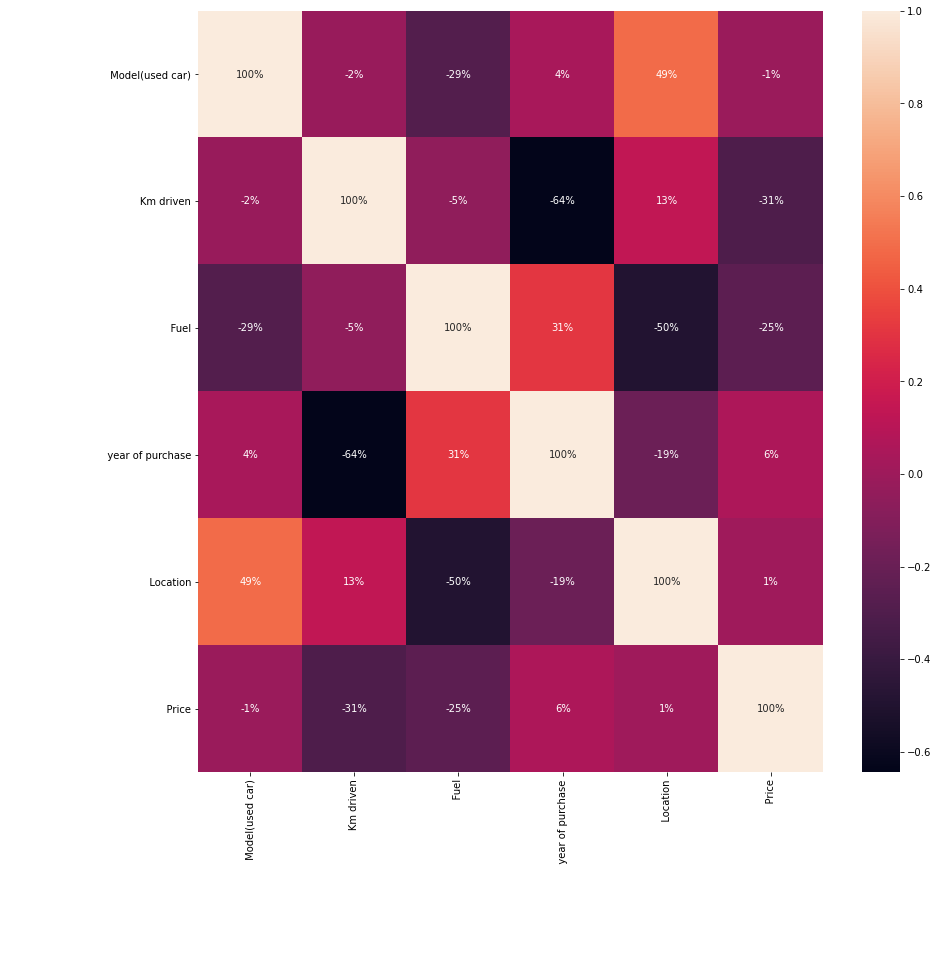

In [16]:
#Visualizing the correlation
plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

From the correlation matrix,we can see that less columns are positively correlated with the target variable 'Price'.We can see that the independent variables are highly correlated with each other,for example,'Model(used car)' is highly correlated with 'Location'.

In [17]:
#Plotting histogram

#A histogram shows the frequency on the vertical axis and the horizontal axis in another dimension. 

# In this graph, we can also check whether the graph is right skewed, left skewed or the graph is normally distributed graph


array([[<AxesSubplot:title={'center':'                                 Model(used car)'}>,
        <AxesSubplot:title={'center':'       Km driven'}>,
        <AxesSubplot:title={'center':'    Fuel'}>,
        <AxesSubplot:title={'center':'   year of purchase'}>],
       [<AxesSubplot:title={'center':'                           Location'}>,
        <AxesSubplot:title={'center':'            Price'}>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

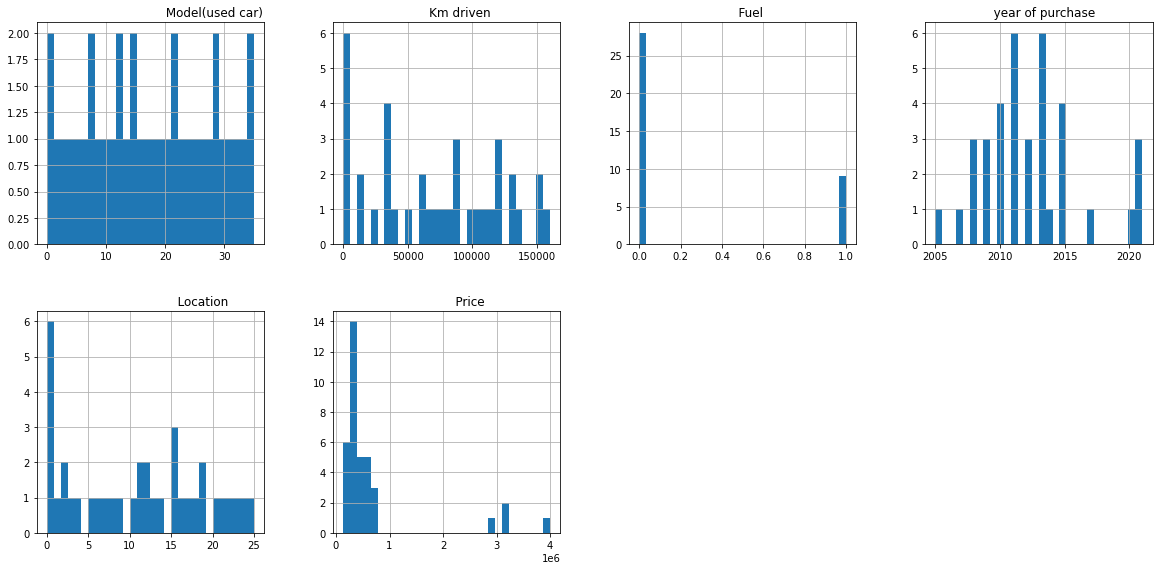

In [18]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

Data is almost normally distributed.

In [19]:
#Checking skewness in my data
df.skew()

                                 Model(used car)    0.040904
       Km driven                                    0.083194
    Fuel                                            1.248066
   year of purchase                                 0.794666
                           Location                 0.081519
            Price                                   2.609456
dtype: float64

We will not go for skewness removal for object type columns

                                 Model(used car)       AxesSubplot(0.125,0.71587;0.133621x0.16413)
       Km driven                                    AxesSubplot(0.285345,0.71587;0.133621x0.16413)
    Fuel                                             AxesSubplot(0.44569,0.71587;0.133621x0.16413)
   year of purchase                                 AxesSubplot(0.606034,0.71587;0.133621x0.16413)
                           Location                 AxesSubplot(0.766379,0.71587;0.133621x0.16413)
            Price                                     AxesSubplot(0.125,0.518913;0.133621x0.16413)
dtype: object

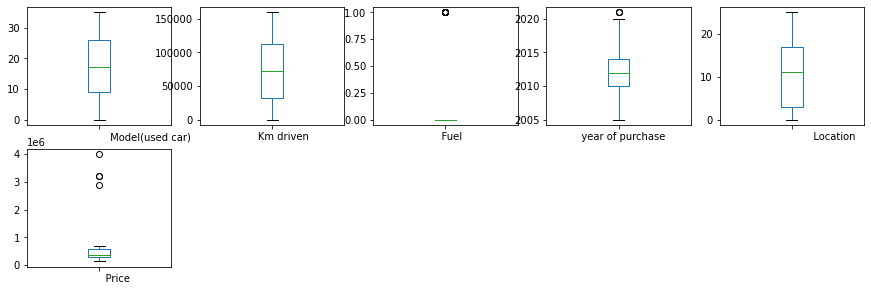

In [20]:
#Checking outliers using boxplots

df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

From the boxplots,it is clearly seen that no such outliers are present,so we will not go for outlier removal.

In [21]:
#Splitting the independent and target variable in x and y

x=df.drop('            Price',axis=1)
y=df['            Price']

In [22]:
#Using StandardScaler to scale the data 

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [23]:
#Model Building(Finding the best random state)

model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score=0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        r2_sc=r2_score(test_y,pre)
        print('r2 score correspond to random state',r_state,'is',r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i
print()
print()
print()
print()
print('max r2 score correspond to random state',final_state,'is',max_r2_score,'and model is',final_model)

r2 score correspond to random state 40 is -0.2575760540849614
r2 score correspond to random state 40 is 0.12146506691214565
r2 score correspond to random state 40 is 0.8630249616998735
r2 score correspond to random state 40 is 0.23001770897900253
r2 score correspond to random state 40 is -0.15315110773167628
r2 score correspond to random state 41 is 0.3206184095152591
r2 score correspond to random state 41 is 0.0013612284247461748
r2 score correspond to random state 41 is 0.41401084240218
r2 score correspond to random state 41 is -0.06108916956640709
r2 score correspond to random state 41 is 0.49957537766449367
r2 score correspond to random state 42 is -8.622976465470463
r2 score correspond to random state 42 is -1.0408987565889496
r2 score correspond to random state 42 is -5.363367166019499
r2 score correspond to random state 42 is -2.2274264199995364
r2 score correspond to random state 42 is -6.669640145200026
r2 score correspond to random state 43 is -0.286936791674703
r2 score corr

#### Above we are using for loop which helps us to provide the r2 score at each random state and for the best state where r2 score is maximum has come as output value.

#### The best model is AdaBoostRegressor and the r2 score is 98% to random state 60.

In [24]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=60,test_size=0.33)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(train_x,train_y)

AdaBoostRegressor()

In [27]:
y_pred=ab.predict(test_x)

In [28]:
y_pred=ab.predict(test_x)

In [29]:
ab.score(train_x,train_y)

0.9905429735321317

In [30]:
ab.score(test_x,test_y)

0.9710651573651511

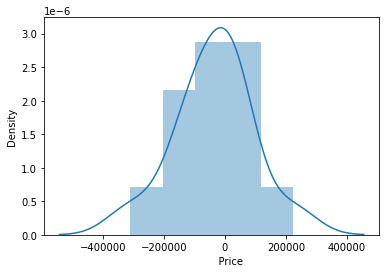

In [31]:
#Distribution plot

sns.distplot(test_y-y_pred)
plt.show()

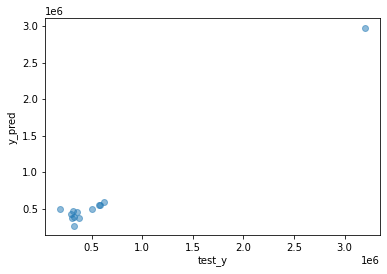

In [32]:
#Scatter-plot

plt.scatter(test_y, y_pred, alpha = 0.5)
plt.xlabel("test_y")
plt.ylabel("y_pred")
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error:',mean_absolute_error(test_y,y_pred))
print('Mean Squared Error:',mean_squared_error(test_y,y_pred))
print('Root Mean Absolute Error:',np.sqrt(mean_absolute_error(test_y,y_pred)))

Mean Absolute Error: 93458.12588052971
Mean Squared Error: 16619002103.393894
Root Mean Absolute Error: 305.70921785338714


In [34]:
#Hyperparameter tuning using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [35]:
#List of parameters to pass

n_estimators = [10,50,100]
loss=['linear','square','exponential']

#max_features = ['auto', 'sqrt']
#max_depth = [2, 3, 5]
#min_samples_split = [2, 4, 6]
#min_samples_leaf = [1, 2, 4, 6]

learning_rate=[0.1]

In [36]:
#Creating random grid

random_grid = {'n_estimators': n_estimators,
               'loss':loss,
               'learning_rate':learning_rate}

In [37]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

ab_random = RandomizedSearchCV(estimator = ab, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=60, n_jobs = 1)


In [38]:
ab_random.fit(train_x,train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, loss=linear, n_est

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [10, 50, 100]},
                   random_state=60, scoring='neg_mean_squared_error',
                   verbose=2)

In [39]:
ab_random.best_params_

{'n_estimators': 100, 'loss': 'exponential', 'learning_rate': 0.1}

In [40]:
ab=AdaBoostRegressor(n_estimators=50,loss='exponential',learning_rate=0.1)
ab.fit(train_x,train_y)
ab.score(train_x,train_y)
pred=ab.predict(test_x)
abr=r2_score(test_y,pred)
print('R2 score:',abr*100)

R2 score: 98.94850765767032


## The accuracy obtained using AdaBoostRegressor is 99%.